In [1]:
import pandas as pd
import numpy as np
import time
from datetime import timedelta,datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.interpolate import CubicSpline, make_splrep

from data_generation import data_split
from features_generation import calculate_deviations

In [3]:
df1=pd.read_pickle('ncrptd.pkl')
df1.reset_index(inplace = True)

df=pd.DataFrame(columns = ['well_id', 'param_id', 'tm_time','tm_value'])
df['well_id'] = df1['wd']+2024
df['param_id'] = df1['pd']+1703
df['tm_time'] = df1['tt']+timedelta(days=10000)
df['tm_value'] = df1['tv']/1.1

print(df['tm_time'].min(), df['tm_time'].max())

2024-04-01 00:00:00 2024-04-02 00:00:00


In [4]:
data_ri = pd.read_pickle('ri.pkl')
df_ri = pd.DataFrame(columns = ['well_id', 'regime_mode', 'data'])
df_ri['well_id'] = data_ri['wd']+2024
df_ri['data'] = data_ri['rd'] + timedelta(days = 10000)
df_ri['regime_mode'] = data_ri['regime_mode']

df_ri

,well_id,regime_mode,data
0,2270005300,ПДФ,2023-06-01
1,2270010500,ПДФ,2023-09-03
2,2270011311,ПДФ,2022-12-19
3,2270011401,ПДФ,2022-04-11
4,2270011508,ПДФ,2023-11-01
...,...,...,...
3627,9880203000,ПКВ,2024-02-18
3628,9880203600,ПДФ,2024-03-05
3629,9880203700,ПКВ,2024-03-23
3630,9880203800,АПВ,2024-03-30


In [7]:
df_ri = df_ri.query('regime_mode == "ПДФ"')
df_ri

,well_id,regime_mode,data
0,2270005300,ПДФ,2023-06-01
1,2270010500,ПДФ,2023-09-03
2,2270011311,ПДФ,2022-12-19
3,2270011401,ПДФ,2022-04-11
4,2270011508,ПДФ,2023-11-01
...,...,...,...
3623,9880105100,ПДФ,2023-04-03
3624,9880106000,ПДФ,2023-05-12
3626,9880200103,ПДФ,2022-10-03
3628,9880203600,ПДФ,2024-03-05


In [9]:
list_of_dfs = data_split(df,well_id_int=9880203600,param_id_list=[188,200],package_size=10000, leftcut=0)

C:\Users\Pro10\Desktop\data_generation.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(inplace=True)


In [11]:
result_df = calculate_deviations(list_of_dfs, dict_values = {188: [50,200], 200: [20, 55]})

result_df[-1][0]

,188_Value,188_Deviation from Mean,188_Deviation from Weighted Mean,188_Deviation from Q1,188_Deviation from Median,188_Deviation from Q3,188_Deviation from Previous Value,188_Deviation from Set Min Value,188_Deviation from Set Max Value,200_Value,200_Deviation from Mean,200_Deviation from Weighted Mean,200_Deviation from Q1,200_Deviation from Median,200_Deviation from Q3,200_Deviation from Previous Value,200_Deviation from Set Min Value,200_Deviation from Set Max Value
tm_time,,,,,,,,,,,,,,,,,,
2024-04-01 00:06:14,54.310000,0.094939,0.111726,0.138800,0.101750,0.039763,NaN,4.310000,-145.690000,61.0,0.175423,0.193371,0.286667,0.0,0.0,NaN,41.0,6.0
2024-04-01 00:06:15,54.309933,0.094872,0.111660,0.138733,0.101683,0.039696,-0.000067,4.309933,-145.690067,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
2024-04-01 00:06:16,54.309867,0.094806,0.111593,0.138667,0.101617,0.039629,-0.000067,4.309867,-145.690133,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
2024-04-01 00:06:17,54.309800,0.094739,0.111526,0.138600,0.101550,0.039563,-0.000067,4.309800,-145.690200,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
2024-04-01 00:06:18,54.309733,0.094672,0.111460,0.138533,0.101483,0.039496,-0.000067,4.309733,-145.690267,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01 23:53:05,54.109933,-0.105128,-0.088340,-0.061267,-0.098317,-0.160304,0.000017,4.109933,-145.890067,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
2024-04-01 23:53:06,54.109950,-0.105111,-0.088324,-0.061250,-0.098300,-0.160287,0.000017,4.109950,-145.890050,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0
2024-04-01 23:53:07,54.109967,-0.105094,-0.088307,-0.061233,-0.098283,-0.160271,0.000017,4.109967,-145.890033,61.0,0.175423,0.193371,0.286667,0.0,0.0,0.0,41.0,6.0


In [13]:
df = pd.DataFrame()
df['188_Value'] = result_df[-1][0]['188_Value']
df

,188_Value
tm_time,
2024-04-01 00:06:14,54.310000
2024-04-01 00:06:15,54.309933
2024-04-01 00:06:16,54.309867
2024-04-01 00:06:17,54.309800
2024-04-01 00:06:18,54.309733
...,...
2024-04-01 23:53:05,54.109933
2024-04-01 23:53:06,54.109950
2024-04-01 23:53:07,54.109967


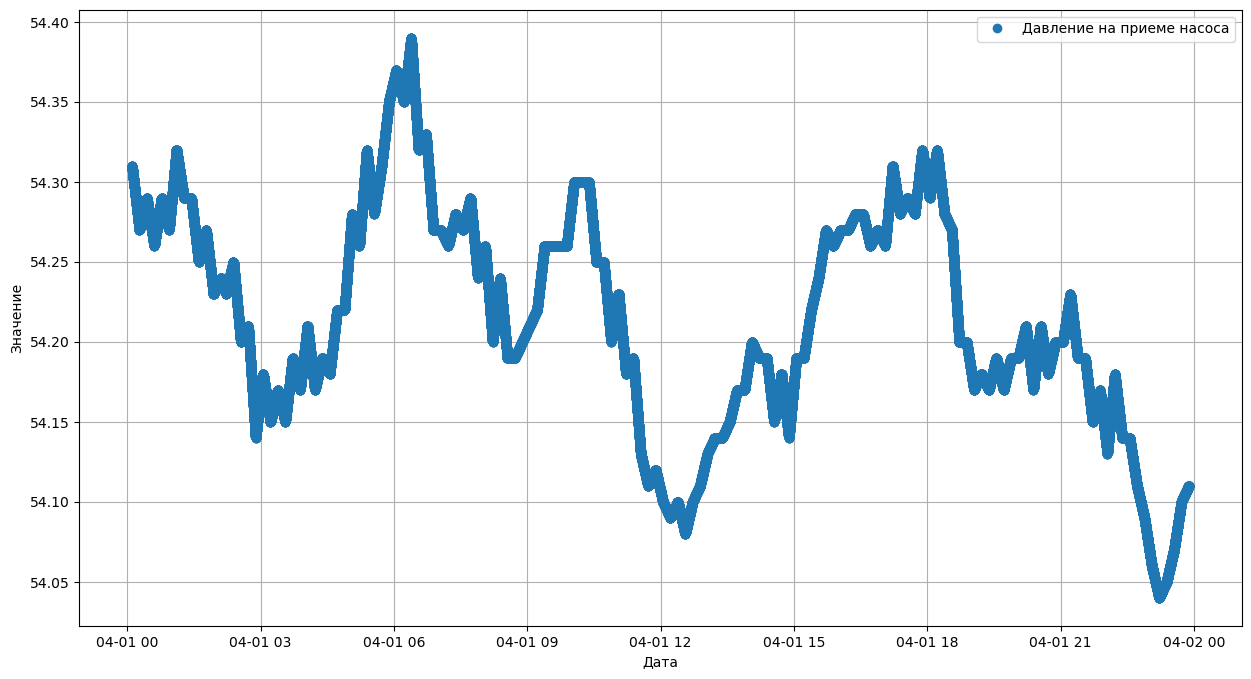

In [15]:
# Построение графика
plt.figure(figsize=(15, 8))
plt.plot(df, 'o', label='Давление на приеме насоса')


# Настройки графика

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.xticks() 
plt.yticks() 
plt.grid(True)

# Показ графика
plt.show()

In [113]:
def line(x, y, method='loess', s = 0):

    if method == 'B-spline':
        trend = make_splrep(x, y, s = s)
        new_y = trend(x)
        trend_df = pd.DataFrame({'date': x, 'trend': new_y})
        
    if method == 'loess':
        lowess = sm.nonparametric.lowess
        # Применение LOWESS
        lowess_model = lowess(y, x, frac=0.2)
        trend_df = pd.DataFrame({'date': df.index, 'trend': lowess_model[:,1]})
    
    return trend_df

In [147]:
def calculate_spline(x, y, s):
    spline = make_splrep(x, y, s = s)
    new_y = spline(x)
    spline_df = pd.DataFrame({'x': x, 'trend': new_y})
    return spline_df
def calculate_splines_paket(x, y, s = 9):
    spline_paket=[]
    for i in range(4, len(x)):
        result = calculate_spline(x[:i], y[:i], s)
        spline_paket.append(result)
    return spline_paket 



def draw_trend(x,y,s):
    plt.figure(figsize=(10, 5))
    for i in range(4, len(x)):
        result = trend(x[:i], y[:i], s)
    
        plt.cla()
        plt.scatter(x[:i], y[:i], color='red', label='Точки данных', alpha=0.6)
        
        plt.plot(result['x'], result['trend'], color='blue', label='Обновляемый B-сплайн')
        plt.legend()
        plt.pause(0.1)  # Имитация реального времени


    plt.show()

In [145]:
# Генерируем поток данных
np.random.seed(42)
x = np.arange(40)
y = np.sin(x / 10) + np.random.normal(0, 0.1, size=len(x))
trend(x,y,s=5)

[   x     trend
 0  0  0.049671
 1  1  0.086007
 2  2  0.263438
 3  3  0.447823,
    x     trend
 0  0  0.051657
 1  1  0.078063
 2  2  0.275354
 3  3  0.439879
 4  4  0.367989,
    x     trend
 0  0  0.032610
 1  1  0.130442
 2  2  0.256307
 3  3  0.373215
 4  4  0.444177
 5  5  0.432203,
    x     trend
 0  0  0.012503
 1  1  0.170657
 2  2  0.266361
 3  3  0.333000
 4  4  0.403962
 5  5  0.512633
 6  6  0.692402,
    x     trend
 0  0  0.027999
 1  1  0.147413
 2  2  0.250864
 3  3  0.344622
 4  4  0.434955
 5  5  0.528130
 6  6  0.630416
 7  7  0.748080,
    x     trend
 0  0  0.043342
 1  1  0.129879
 2  2  0.233330
 3  3  0.344622
 4  4  0.454681
 5  5  0.554431
 6  6  0.634799
 7  7  0.686711
 8  8  0.701093,
    x     trend
 0  0  0.030128
 1  1  0.141441
 2  2  0.248432
 3  3  0.350285
 4  4  0.446186
 5  5  0.535318
 6  6  0.616866
 7  7  0.690015
 8  8  0.753949
 9  9  0.807852,
      x     trend
 0    0  0.034809
 1    1  0.138320
 2    2  0.243361
 3    3  0.347165
 4    4

In [119]:
x = df.index.values
y = df['188_Value'].values

In [107]:
x,y

(array(['2024-04-01T00:06:14.000000000', '2024-04-01T00:06:15.000000000',
        '2024-04-01T00:06:16.000000000', ...,
        '2024-04-01T23:53:07.000000000', '2024-04-01T23:53:08.000000000',
        '2024-04-01T23:53:09.000000000'], dtype='datetime64[ns]'),
 array([54.31      , 54.30993333, 54.30986667, ..., 54.10996672,
        54.10998336, 54.11      ]))

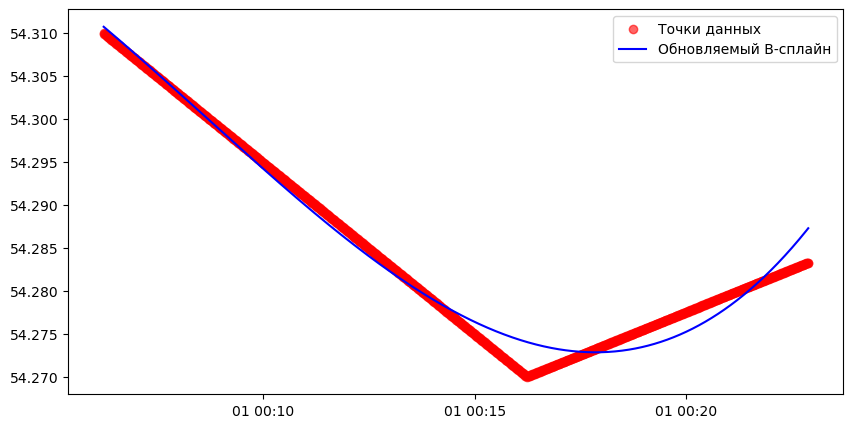

CPU times: total: 16.8 s
Wall time: 16.9 s


In [123]:
%%time
draw_trend(x[:1001],y[:1001], s = 5)

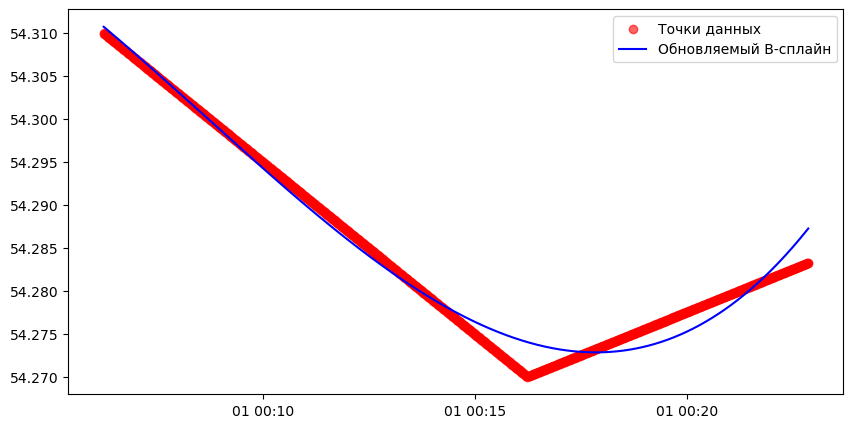

CPU times: total: 14.1 s
Wall time: 14 s


In [121]:
%%time
draw_trend(x[:1000],y[:1000], s = 5)

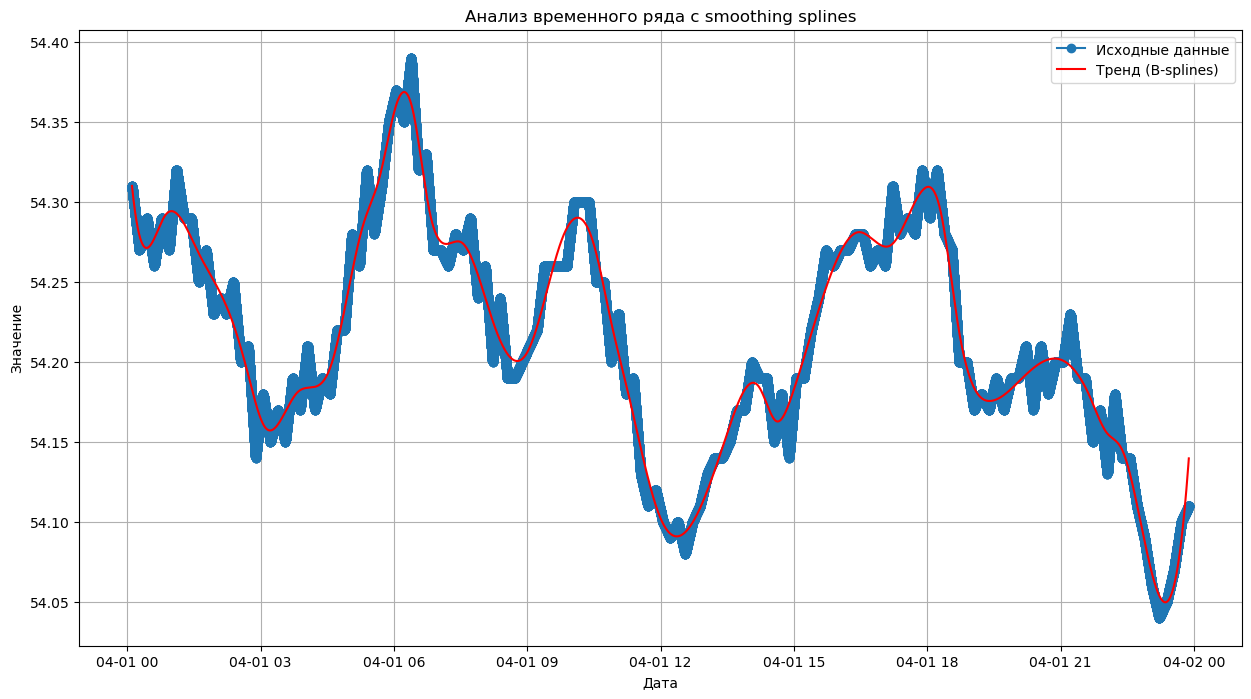

In [27]:
# Графическое отображение данных и тренда
plt.figure(figsize=(15, 8))
plt.plot(df, marker='o', label='Исходные данные')
plt.plot(B_spline_df['date'], B_spline_df['trend'], color='r', label='Тренд (B-splines)')
plt.title('Анализ временного ряда с smoothing splines')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def trend(x,y, s):
    
    trend = CubicSpline(x, y)
    new_y = trend(x)
    trend_df = pd.DataFrame({'x': x, 'trend': new_y})
    return trend_df
    
def draw_trend(x,y,s = 9):
    plt.figure(figsize=(10, 5))
    for i in range(4, len(x)):
        result = trend(x[:i], y[:i], s)
    
        plt.cla()
        plt.scatter(x[:i], y[:i], color='red', label='Точки данных', alpha=0.6)
        
        plt.plot(result['x'], result['trend'], color='blue', label='Обновляемый B-сплайн')
        plt.legend()
        plt.pause(0.1)  # Имитация реального времени


    plt.show()

In [240]:
# Установите дату в качестве индекса для всех датафреймов
#Cube_spline_df.set_index('date', inplace=True)
#lowess_df.set_index('date', inplace=True)
#B_spline_df.set_index('date', inplace=True)

# Функция для расчета MSE и MAE
def calculate_metrics(df_true, df_pred):
    error = df_true['188_Value'] - df_pred['trend']
    mse = (error ** 2).mean()
    mae = abs(error).mean()
    return {'MSE': mse, 'MAE': mae}


#metrics_Cube_spline = calculate_metrics(df, Cube_spline_df)
metrics_lowess = calculate_metrics(df, lowess_df)
metrics_B_spline = calculate_metrics(df, B_spline_df)

# Выведите результаты
#print("Metrics for Cube_spline_df:")
#print(metrics_Cube_spline)

print("\nMetrics for lowess_df:")
print(metrics_lowess)

print("\nMetrics for B_spline_df:")
print(metrics_B_spline)


Metrics for lowess_df:
{'MSE': 0.0009899240968245949, 'MAE': 0.02555267052814199}

Metrics for B_spline_df:
{'MSE': nan, 'MAE': nan}


In [242]:
def trends(x, y, n = 3):
    trend_df = pd.DataFrame({'date': x})
    for i in range(n):
        trend = make_splrep(x, y, s = i*n*n)
        new_y = trend(x)
        trend_df[f'trend_{n*n*i}'] = new_y
    return trend_df

In [244]:
three_trends = trends(x, y)


In [246]:
print(three_trends)

                     date    trend_0    trend_9   trend_18
0     2024-04-01 00:06:14  54.310000  54.304484  54.282530
1     2024-04-01 00:06:15  54.309933  54.304434  54.282529
2     2024-04-01 00:06:16  54.309867  54.304385  54.282528
3     2024-04-01 00:06:17  54.309800  54.304335  54.282528
4     2024-04-01 00:06:18  54.309733  54.304286  54.282527
...                   ...        ...        ...        ...
85611 2024-04-01 23:53:05  54.109933  54.140868  54.124000
85612 2024-04-01 23:53:06  54.109950  54.140978  54.124075
85613 2024-04-01 23:53:07  54.109967  54.141087  54.124151
85614 2024-04-01 23:53:08  54.109983  54.141197  54.124226
85615 2024-04-01 23:53:09  54.110000  54.141306  54.124302

[85616 rows x 4 columns]


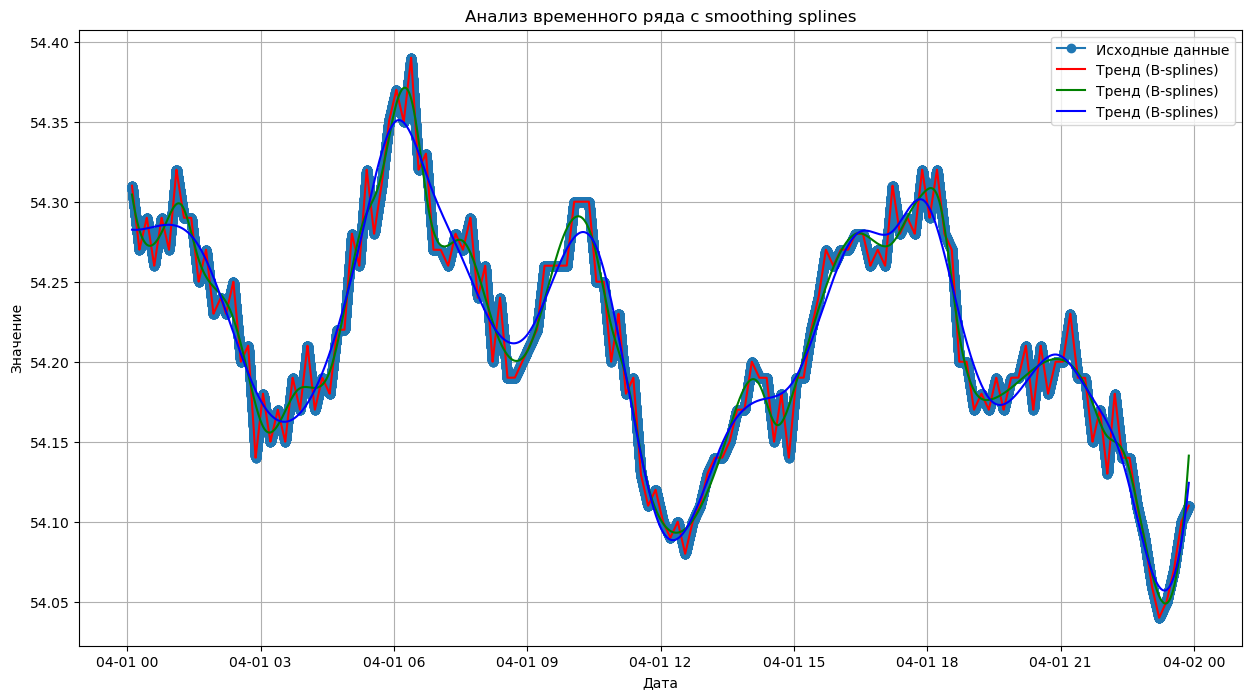

In [250]:

# Графическое отображение данных и тренда
plt.figure(figsize=(15, 8))
plt.plot(df, marker='o', label='Исходные данные')
plt.plot(three_trends['date'], three_trends['trend_0'], color='r', label='Тренд (B-splines)')
plt.plot(three_trends['date'], three_trends['trend_9'], color='g', label='Тренд (B-splines)')
plt.plot(three_trends['date'], three_trends['trend_18'], color='b', label='Тренд (B-splines)')
plt.title('Анализ временного ряда с smoothing splines')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()